# Solution for delta source

A script that numerically evaluates the convolution with a delta source.

In [3]:
# include necessary libraries
import numpy as np
from soundpy import *
import sympy as sp
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

%matplotlib notebook

In [6]:
F = None
if __name__ == '__main__':
    from soundpy import estimator
    
    F = estimator(max_order=1, multiprocess = True, n_cores = 10)

Generating Estimator for order 1
Assembling the estimator using multiprocessing on 10 cores
Permuations created successfully
	Send the slow data to the pool
	Send the fast data to the pool
	Slow: 0, 0, 0 Done!
	Fast: 0, 0, 0 Done!
	Slow: 1, 0, 0 Done!
	Fast: 1, 0, 0 Done!
	Fast: 1, 1, 1 Done!
	Slow: 1, 1, 1 Done!
	Slow: 1, 1, 0 Done!
	Fast: 1, 1, 0 Done!
Pool closed Successfully
recasting functions


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Estimator Generated Successfully


<IPython.core.display.Javascript object>


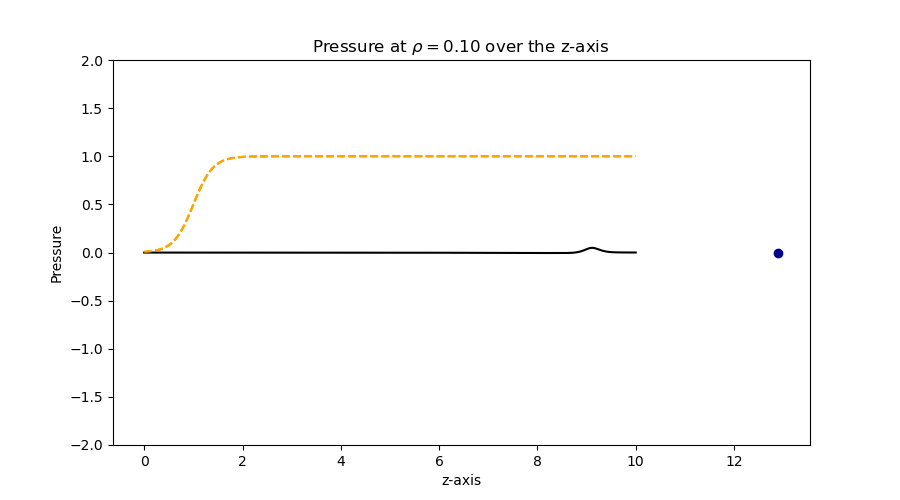

interactive(children=(FloatSlider(value=0.1, description='r', max=5.0, step=0.01), FloatSlider(value=1.0, desc…

In [9]:
# Set up a plot
fig = plt.figure(figsize=(9,5))
ax  = fig.add_subplot(111)

# Customization
z_lims  = (0,10)
y_lims  = (-2,2)
# ax.set_xlim(*z_lims)
ax.set_ylim(*y_lims)
ax.set_xlabel('z-axis')
ax.set_ylabel('Pressure')
ax.set_title(r'Pressure at $\rho = 0.10$ over the z-axis')

# Data
N_pts   = 1000
z       = np.linspace(*z_lims,N_pts)
T_lims  = (0,5)
Z       = 4
T       = np.linspace(*T_lims,N_pts)

# Widgets and updating
@widgets.interact(r=(0,5,0.01),t=(0,10,0.1),v=(0,3,0.01),lamda=(0,1,0.001),a=(0,100,1),s=(-10,10,0.1))
def update(r=0.1,t=1,v=1.5,lamda=0.1,a=5,s=1):
    [l.remove() for l in ax.lines]
    
    ax.set_title(r'Pressure at $\rho = %4.2f$ over the z-axis'%r)
    ax.plot(z, F(r,z,t,v,lamda,a,s), color='k')
    ax.plot(z,1/(1+np.exp(-a*(z - s))), ls='--',c='orange')
    ax.plot([v*t],[0],marker='o',c='darkblue')

In [22]:
# Create an animation
# Animation parameters
N_pts   = 1000
t       = 5
r       = 0.15
v       = 1.5
lamda   = 0.1
a       = 5
s       = 1
z_lims  = (0,5)
y_lims  = (-2,2)
T_lims  = (z_lims[0]/v,z_lims[1]/v)
z       = np.linspace(*z_lims,N_pts)
T       = np.linspace(*T_lims,N_pts)

#Create the figure
fig = plt.figure(figsize=(9,5))
ax  = fig.add_subplot(111)

# Data
N_pts   = 1000
z       = np.linspace(*z_lims,N_pts)

# Plot the first frame
pressure, = ax.plot(z, F(r,z,T[0],v,lamda,a,s), color='k',label='Pressure')
particle, = ax.plot([v*T[0]],[0],marker='o',c='darkblue',label='Particle')

# Plot the energy background
ax.plot(z,1/(1+np.exp(-a*(z - s))), ls='--',c='orange',label='Energy Density deposited')

def init():
    # Customization
    z_lims  = (0,5)
    y_lims  = (-2,2)
    ax.set_xlim(*z_lims)
    ax.set_ylim(*y_lims)
    ax.set_xlabel('z-axis')
    ax.set_ylabel('Pressure')
    ax.set_title(r'Pressure at $\rho = 0.10$ over the z-axis')
    ax.legend(frameon=False)
    

def next_frame(i):
    pressure.set_data(z,F(r,z,T[i],v,lamda,a,s))
    particle.set_data([v*T[i]],[0])
    
    return pressure,particle


anim = FuncAnimation(fig, next_frame, frames=tqdm(range(len(T))),init_func=init, blit=True)

<IPython.core.display.Javascript object>

  0%|          | 0/1000 [00:00<?, ?it/s]

In [23]:
writer = animation.FFMpegWriter(fps=60,extra_args=['-threads', '50'])
anim.save('r0.1-v1.5-l0.1-a5-s1.mp4',writer=writer)

Process SpawnPoolWorker-37:
Process SpawnPoolWorker-38:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/homebrew/Caskroom/miniforge/base/

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '900x500', '-pix_fmt', 'rgba', '-r', '60', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-threads', '50', '-y', 'r0.1-v1.5-l0.1-a5-s1.mp4']' died with <Signals.SIGINT: 2>.

In [50]:
N_pts   = 1000
t       = 2.12
r       = 0.1
v       = 1.5
L       = 0.1
a       = 5
s       = 1
z_lims  = (0,5)
y_lims  = (-2,2)
T_lims  = (z_lims[0]/v,z_lims[1]/v)
z       = np.linspace(*z_lims,N_pts)
T       = np.linspace(*T_lims,N_pts)

for term in F.terms_fast:
    print(min(term(r,z,t,v,L,a,s)))

-0.1097758844586171
-0.06951379477144481
-7682.545251071935
-0.06951379477144481


<IPython.core.display.Javascript object>


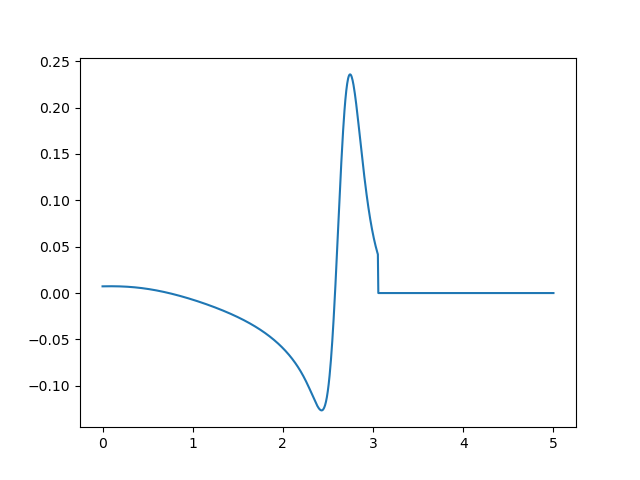

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z,F(r,z,t,v,L,a,s) - F.terms_fast[2](r,z,t,v,L,a,s))

In [36]:
print(F.terms_fast[2](r,z,t,v,L,a,s))

[ 3.10124564e-03  3.16185813e-03  3.22231910e-03  3.28260984e-03
  3.34271151e-03  3.40260516e-03  3.46227176e-03  3.52169216e-03
  3.58084713e-03  3.63971738e-03  3.69828354e-03  3.75652619e-03
  3.81442588e-03  3.87196309e-03  3.92911830e-03  3.98587198e-03
  4.04220458e-03  4.09809657e-03  4.15352842e-03  4.20848066e-03
  4.26293383e-03  4.31686853e-03  4.37026542e-03  4.42310524e-03
  4.47536880e-03  4.52703703e-03  4.57809095e-03  4.62851169e-03
  4.67828052e-03  4.72737886e-03  4.77578827e-03  4.82349047e-03
  4.87046736e-03  4.91670104e-03  4.96217380e-03  5.00686812e-03
  5.05076672e-03  5.09385255e-03  5.13610880e-03  5.17751891e-03
  5.21806659e-03  5.25773582e-03  5.29651087e-03  5.33437630e-03
  5.37131698e-03  5.40731810e-03  5.44236517e-03  5.47644404e-03
  5.50954091e-03  5.54164232e-03  5.57273519e-03  5.60280681e-03
  5.63184485e-03  5.65983737e-03  5.68677283e-03  5.71264010e-03
  5.73742846e-03  5.76112761e-03  5.78372770e-03  5.80521930e-03
  5.82559341e-03  5.84484

In [37]:
print(F.terms_fast[0](r,z,t,v,L,a,s))

[ 7.11374298e-03  7.13303564e-03  7.15186421e-03  7.17021999e-03
  7.18809429e-03  7.20547837e-03  7.22236348e-03  7.23874087e-03
  7.25460174e-03  7.26993731e-03  7.28473877e-03  7.29899730e-03
  7.31270409e-03  7.32585031e-03  7.33842713e-03  7.35042572e-03
  7.36183725e-03  7.37265290e-03  7.38286385e-03  7.39246128e-03
  7.40143638e-03  7.40978038e-03  7.41748450e-03  7.42453996e-03
  7.43093804e-03  7.43667001e-03  7.44172718e-03  7.44610086e-03
  7.44978242e-03  7.45276324e-03  7.45503473e-03  7.45658835e-03
  7.45741559e-03  7.45750796e-03  7.45685704e-03  7.45545443e-03
  7.45329178e-03  7.45036081e-03  7.44665326e-03  7.44216092e-03
  7.43687567e-03  7.43078942e-03  7.42389413e-03  7.41618183e-03
  7.40764462e-03  7.39827466e-03  7.38806418e-03  7.37700546e-03
  7.36509088e-03  7.35231286e-03  7.33866393e-03  7.32413666e-03
  7.30872373e-03  7.29241789e-03  7.27521195e-03  7.25709884e-03
  7.23807156e-03  7.21812318e-03  7.19724690e-03  7.17543597e-03
  7.15268375e-03  7.12898

In [48]:
sp.singularities(F.get_fast_term(1,1,1).subs({'v':1.6,'a':5,'s':1}),sp.Symbol(r))

KeyboardInterrupt: 